# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin: A 1929-Esque Bubble.  Due to an inability to regulate Bitcoin, the value of the cryptocurrency is incredibly easy to manipulate -- and so it is very commonly manipulated.The rampant market manipulation reminds me of a pre-SEC world where, in the 1920s, stocks ran wild until ultimately busting in a catastrophic manner.Bitcoin is a failed currency and has no intrinsic value beyond being a means to pay for goods. This makes its value as an investment purely emotion-based.The incredible energy consumption of Bitcoin mining is in direct opposition to the cryptocurrency’s largest support base and is what I’ve identified as the catalyst to pop the bubble. ... [| Skaityti daugiau](https://seekingalpha.com/article/4426656-bitcoin-btc-1929-esque-bubble?utm_source=cryptocompare.com&utm_medium=referral) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- The National.  The National for May 9: Three provinces crack down to battle rising COVID-19 cases. Plus, the high stakes of a positive drug test after the Kentucky Derby. ... [| Skaityti daugiau](http://www.cbc.ca/player/play/1866224707562) 

### Kainų kaita pandemijos metu

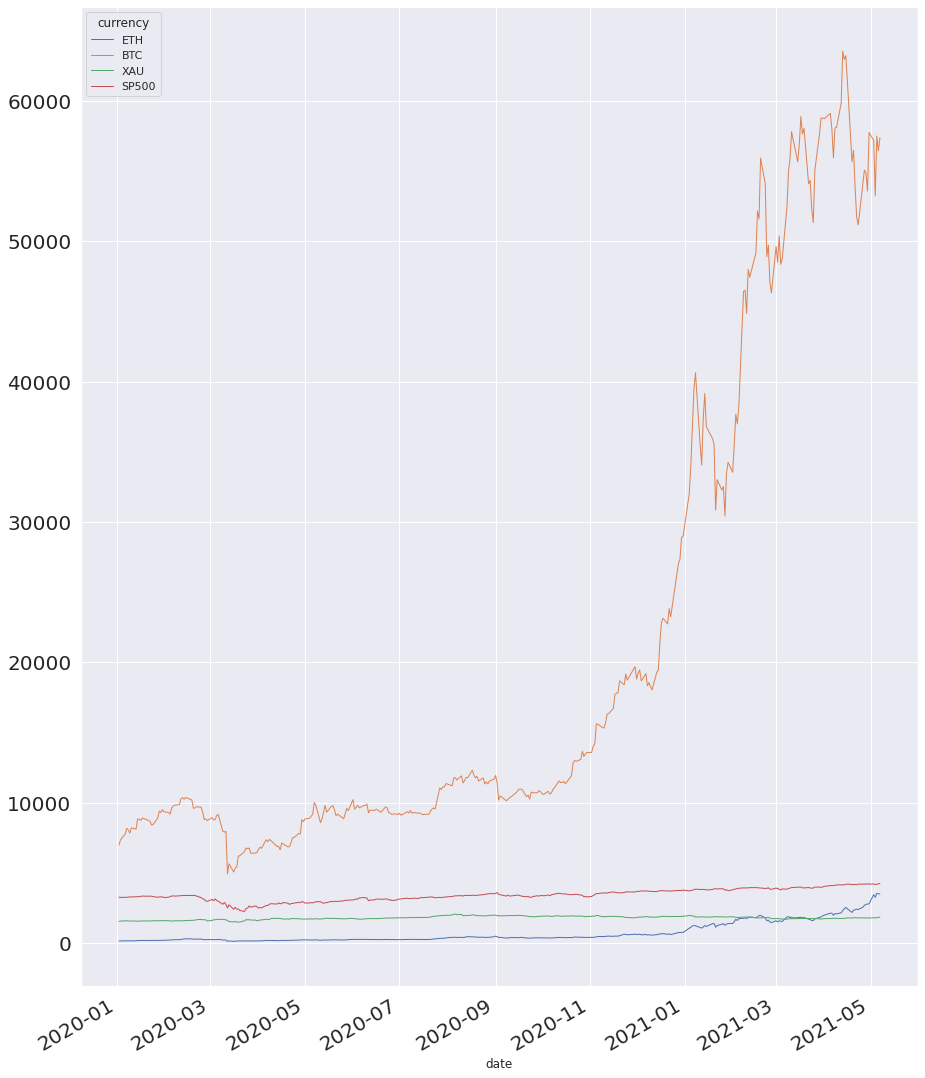

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.956569,0.120223,0.826019
BTC,0.956569,1.000000,0.090413,0.840876
XAU,0.120223,0.090413,1.000000,0.370658
SP500,0.826019,0.840876,0.370658,1.000000


In [8]:
#hide ### Koreliacijos matrica.

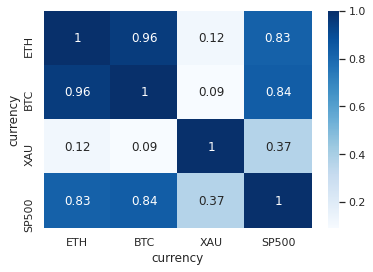

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')